In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Marketing : Comment prédire les ventes futures ?

In [2]:
df  = pd.read_csv('Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.10,37.80,69.20,22.10
1,2,44.50,39.30,45.10,10.40
2,3,17.20,45.90,69.30,9.30
3,4,151.50,41.30,58.50,18.50
4,5,180.80,10.80,58.40,12.90


## DATA CLEANING AND EXPLORATION

In [3]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

In [5]:
df = df.rename(columns={'TV Ad Budget ($)': 'tv', 'Radio Ad Budget ($)': 'radio', 'Newspaper Ad Budget ($)': 'newspaper', 'Sales ($)': 'sales'})

In [6]:
df.head()

,tv,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [7]:
df.shape

(200, 4)

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

tv           0
radio        0
newspaper    2
sales        0
dtype: int64

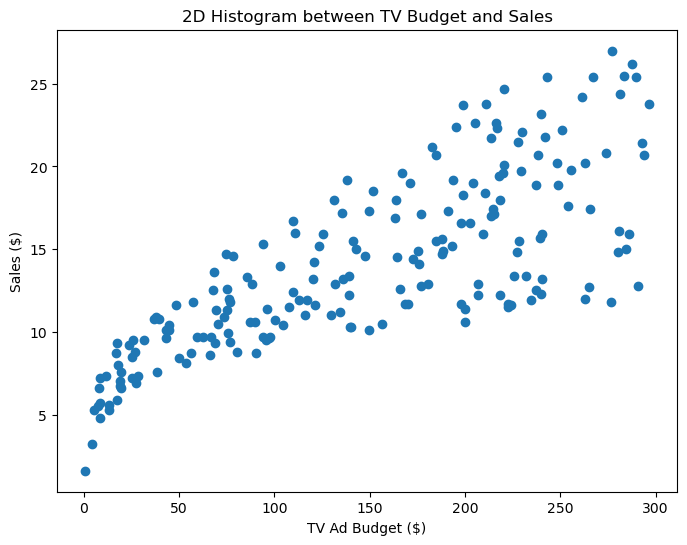

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df, x='tv', y='sales')
plt.title('2D Histogram between TV Budget and Sales')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.show()

In [10]:
correlations = df.corr()['sales'].drop('sales')
print(correlations)

tv          0.78
radio       0.58
newspaper   0.23
Name: sales, dtype: float64


On voit que les ventes dépendent à 78% de la télévision et 57% des radios, ce sont des informations importantes à avoir

Maintenant, ce qu'on peut faire est de construire le modèle en commençant par séparer la donnée à prédire des variables explicatives

In [11]:
X = df.drop(columns=['sales'])
y = df['sales']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 3.1740973539761055
R-squared: 0.899438024100912


Text(0.5, 0, 'Actual Sales ($)')

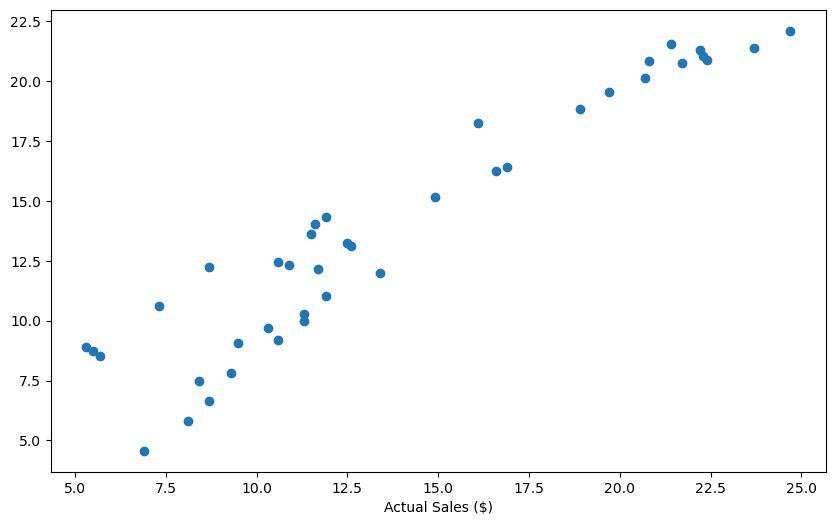

In [16]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales ($)')  

In [17]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

Mean Squared Error (XGBoost): 0.8689325216764425
R-squared (XGBoost): 0.9724704186551494


Mean Squared Error: 0.8689325216764425
R-squared: 0.9724704186551494


Text(0.5, 0, 'Actual Sales ($)')

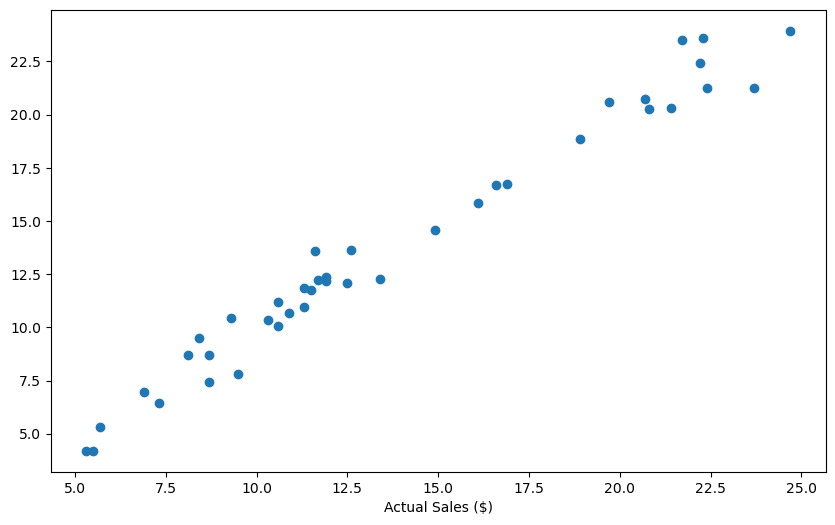

In [18]:
print(f'Mean Squared Error: {mse_xgb}')
print(f'R-squared: {r2_xgb}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Sales ($)')  

On remarque qu'avec celui là, c'est beaucoup plus précis, donc on va garder la prédiction de 97% et le MSE qui est quasiment nul, à savoir 87%

Immobilier : Comment prédire le prix de vente d'une maison en fonction
de ses caractéristiques ?

In [19]:
lazy_reg = LazyRegressor()
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 14.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

## Immobilier : Comment prédire le prix de vente d'une maison en fonction de ses caractéristiques ?

In [20]:
train2_df = pd.read_csv('train.csv')
test2_df = pd.read_csv('test.csv')

In [21]:
train2_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
train2_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
train2_df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [24]:
train2_df.shape

(1460, 81)

In [25]:
train2_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
data = pd.concat([train2_df, test2_df], axis=0, ignore_index=True)
data.shape
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00


In [27]:
data.shape

(2919, 81)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [29]:
def remove_columns_with_many_nans(data, threshold=0.5):
    nan_counts = data.isna().sum()
    columns_to_drop = nan_counts[nan_counts > threshold * len(data)].index
    return data.drop(columns=columns_to_drop)
data = remove_columns_with_many_nans(data, threshold=0.5)

In [30]:
remove_columns_with_many_nans(data, threshold=0.5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.00,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.00,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.00,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.00,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [31]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 76, dtype: int64

In [32]:
data_num = data.select_dtypes(include=[np.number])
data_num.isna().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [33]:
def replace_nans_with_mean(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)
    return data
data = replace_nans_with_mean(data)

In [34]:
def get_missing_data_cat(data):
    missing_data = data.select_dtypes(include=[object]).isna().sum()
    mode = data.select_dtypes(include=[object]).mode().iloc[0]
    missing_data = missing_data.fillna(0)
    for column in missing_data.index:
        if missing_data[column] > 0:
            data[column].fillna(mode[column], inplace=True)
    return data

In [35]:
data = get_missing_data_cat(data)

In [36]:
data.isna().sum().sum()

0

In [37]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,69.31,10168.11,6.09,5.56,1971.31,1984.26,102.20,441.42,...,93.71,47.49,23.10,2.60,16.06,2.25,50.83,6.21,2007.79,180921.20
std,842.79,42.52,21.31,7887.00,1.41,1.11,30.29,20.89,178.63,455.53,...,126.53,67.58,64.24,25.19,56.18,35.66,567.40,2.71,1.31,56174.33
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,730.50,20.00,60.00,7478.00,5.00,5.00,1953.50,1965.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,163000.00
50%,1460.00,50.00,69.31,9453.00,6.00,5.00,1973.00,1993.00,0.00,369.00,...,0.00,26.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,180921.20
75%,2189.50,70.00,78.00,11570.00,7.00,6.00,2001.00,2004.00,163.50,733.00,...,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,180921.20
max,2919.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00,755000.00


In [38]:
data.shape

(2919, 76)

In [39]:
def outliers(data_num):
    Q1 = data_num.quantile(0.25)
    Q3 = data_num.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))
    return outliers.sum()
outliers_count = outliers(data_num)

In [40]:
outliers_count

Id                 0
MSSubClass       207
LotFrontage      198
LotArea          128
OverallQual        4
OverallCond      252
YearBuilt          9
YearRemodAdd       0
MasVnrArea       200
BsmtFinSF1        15
BsmtFinSF2       347
BsmtUnfSF         53
TotalBsmtSF      122
1stFlrSF          42
2ndFlrSF           8
LowQualFinSF      40
GrLivArea         74
BsmtFullBath       2
BsmtHalfBath     175
FullBath           4
HalfBath           0
BedroomAbvGr      78
KitchenAbvGr     134
TotRmsAbvGrd      51
Fireplaces        12
GarageYrBlt        3
GarageCars        17
GarageArea        42
WoodDeckSF        67
OpenPorchSF      159
EnclosedPorch    459
3SsnPorch         37
ScreenPorch      256
PoolArea          13
MiscVal          103
MoSold             0
YrSold             0
SalePrice         61
dtype: int64

In [41]:
correlation_saleprice = data_num.corr()['SalePrice'].sort_values(ascending=False)
print(correlation_saleprice)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
Id              -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


In [42]:
data_num = data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
data_num

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500.00,7,1710,2.00,548.00,856.00,856,2,8,2003,2003
1,181500.00,6,1262,2.00,460.00,1262.00,1262,2,6,1976,1976
2,223500.00,7,1786,2.00,608.00,920.00,920,2,6,2001,2002
3,140000.00,7,1717,3.00,642.00,756.00,961,1,7,1915,1970
4,250000.00,8,2198,3.00,836.00,1145.00,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
2914,180921.20,4,1092,0.00,0.00,546.00,546,1,5,1970,1970
2915,180921.20,4,1092,1.00,286.00,546.00,546,1,6,1970,1970
2916,180921.20,5,1224,2.00,576.00,1224.00,1224,1,7,1960,1996
2917,180921.20,5,970,0.00,0.00,912.00,970,1,6,1992,1992


In [43]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.00


In [44]:
dummies = pd.get_dummies(data.select_dtypes(exclude=[int]), drop_first=True)
dummies.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.00,196.00,706.00,0.00,150.00,856.00,1.00,0.00,2003.00,2.00,...,False,False,False,False,True,False,False,False,True,False
1,80.00,0.00,978.00,0.00,284.00,1262.00,0.00,1.00,1976.00,2.00,...,False,False,False,False,True,False,False,False,True,False
2,68.00,162.00,486.00,0.00,434.00,920.00,1.00,0.00,2001.00,2.00,...,False,False,False,False,True,False,False,False,True,False
3,60.00,0.00,216.00,0.00,540.00,756.00,1.00,0.00,1998.00,3.00,...,False,False,False,False,True,False,False,False,False,False
4,84.00,350.00,655.00,0.00,490.00,1145.00,1.00,0.00,2000.00,3.00,...,False,False,False,False,True,False,False,False,True,False


In [45]:
dummies.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=209)

In [46]:
dummies['SalePrice']

0      208500.00
1      181500.00
2      223500.00
3      140000.00
4      250000.00
          ...   
2914   180921.20
2915   180921.20
2916   180921.20
2917   180921.20
2918   180921.20
Name: SalePrice, Length: 2919, dtype: float64

In [47]:
X_dummies = dummies.drop(columns=['SalePrice'])
y_dummies = dummies['SalePrice']

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_dummies, y_dummies)

y_pred_xgb_dummies = xgb_reg.predict(X_dummies)

print(f"R² sur l'ensemble d'entraînement (XGBoost) : {r2_score(y_dummies, y_pred_xgb_dummies):.4f}")

R² sur l'ensemble d'entraînement (XGBoost) : 0.9640


In [48]:
# Afficher les 5 meilleurs modèles selon le R-Squared avec LazyRegressor
top_models = models.sort_values(by='R-Squared', ascending=False).head()
print(top_models)

                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
ExtraTreesRegressor                      0.99       0.99  0.57        0.03
GradientBoostingRegressor                0.98       0.98  0.73        0.05
RandomForestRegressor                    0.98       0.98  0.77        0.06
BaggingRegressor                         0.97       0.98  0.87        0.01
LGBMRegressor                            0.97       0.97  0.89        0.02


In [49]:
# Entraînement du modèle ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

# Évaluation du modèle
mse_et = mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print(f"Mean Squared Error (ExtraTrees): {mse_et}")
print(f"R-squared (ExtraTrees): {r2_et}")

Mean Squared Error (ExtraTrees): 0.3209388249999955
R-squared (ExtraTrees): 0.9898319935447782


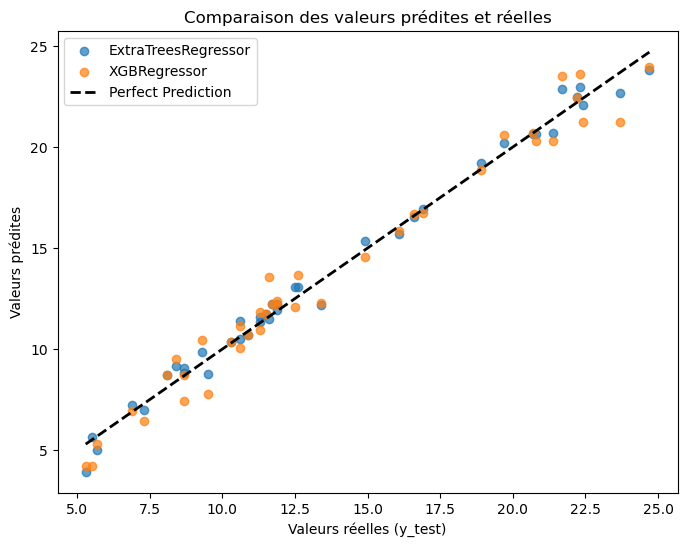

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_et, label='ExtraTreesRegressor', alpha=0.7)
plt.scatter(y_test, y_pred_xgb, label='XGBRegressor', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs prédites et réelles')
plt.legend()
plt.show()